# #1. Handling Missing Data Questions:

How do you identify and handle missing values in a Pandas DataFrame?



Checking for missing values using isnull() and notnull()
In order to check missing values in Pandas DataFrame, we use a function isnull() and notnull(). Both function help in checking whether a value is NaN or not. These function can also be used in Pandas Series in order to find null values in a series.

Handling Missing Values:

Dropping Missing Values:
Use the dropna() method to remove rows or columns with missing values.

Filling Missing Values:
Use the fillna() method to fill missing values with a specific value or a calculated value.

Interpolation:
Use methods like interpolate() to fill missing values based on interpolation methods.

Handling Categorical Data:
For categorical data, consider using a placeholder category or the mode for filling missing values.

Imputation:
Use advanced imputation techniques, like those provided by the SimpleImputer class in scikit-learn.

In [ ]:
df.dropna()                # drops rows with any missing values
df.dropna(axis=1)          # drops columns with any missing values
df.dropna(thresh=n)        # drops rows with less than n non-null values

df.fillna(value)            # fills all missing values with a specific value
df.fillna(df.mean())        # fills missing values with the mean of each column

df.interpolate()            # fills missing values using linear interpolation

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df['categorical_column'].fillna('Unknown', inplace=True)




What is imputation, and why might it be useful in dealing with missing data?

Imputation is the process of replacing missing or incomplete data with substituted values. The goal of imputation is to provide a complete dataset for analysis by estimating or predicting missing values based on the observed data.

Imputation is valuable in addressing missing data for several reasons:

Preservation of Data Integrity:

Imputation allows for the retention of overall dataset structure by filling in missing values, preventing loss of information.

Maintenance of Statistical Power:
By imputing missing values, datasets remain more robust for statistical analysis, ensuring that all available information contributes to meaningful results.

Avoidance of Bias in Analysis:
Imputation helps prevent bias in analyses that could occur if incomplete records are excluded, ensuring a more representative and unbiased representation of the data.

Enhancement of Model Performance:
In machine learning scenarios, imputation contributes to better model training by providing a more complete dataset, potentially leading to improved predictive performance.

Preservation of Data Patterns:
Imputation methods, such as interpolation, help maintain patterns in the data, ensuring that imputed values align with the observed trends and relationships.

Meeting Analysis Assumptions:
Imputation assists in meeting the assumptions of various statistical analyses, allowing for a broader application of analytical techniques that assume complete datasets.

Dealing with Real-world Scenarios:
In practical situations where missing data is common, imputation provides a practical solution for making the most of the available information, allowing for a more comprehensive analysis.

In [ ]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [10, np.nan, 30, 40, 50],
    'C': [100, 200, 300, np.nan, 500]
}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Impute missing values with the mean of each column
df_imputed = df.fillna(df.mean())

# Display the DataFrame after imputation
print("\nDataFrame after Mean Imputation:")
print(df_imputed)


# # 2. Data Transformation Questions:

How can you encode categorical variables in a Pandas DataFrame?

Encoding categorical variables involves converting categorical data (i.e., data that represents categories or labels) into a numerical format that machine learning algorithms can understand. Categorical variables can take on a limited, fixed number of possible values, such as colors, types of fruit, or levels of education. There are methods of encoding:

Ordinal encoding:
Ordinal encoding is similar to label encoding but allows for custom mapping of categories to specific integers based on a predefined order.
Unlike label encoding, where the mapping is based on the order of appearance, ordinal encoding allows for explicit control over the mapping.
Ordinal encoding is suitable for categorical variables with a natural order or hierarchy, where the numerical labels reflect the inherent order of the categories.
Example: If the original categorical column represents levels of education ('low', 'medium', 'high'), ordinal encoding can map them to integers 1, 2, and 3, respectively, based on their order of importance or level.



In [1]:
import pandas as pd
data_ordinal = {'category': ['low', 'medium', 'high', 'medium', 'low']}
df_ord = pd.DataFrame(data_ordinal)

# Define the mapping of categories to integers
mapping = {'low': 1, 'medium': 2, 'high': 3}

df_ord['encoded_category'] = df_ord['category'].map(mapping)

print("Original DataFrame:")
print(df_ord)

Original DataFrame:
  category  encoded_category
0      low                 1
1   medium                 2
2     high                 3
3   medium                 2
4      low                 1


Pandas factorize() The pandas factorize() function is used to encode categorical data. It returns a tuple containing two elements:
An array of integers representing the numerical labels of the categorical data.
An Index object that contains the unique categories in the data, along with their corresponding integer codes. Example: the original categorical column 'category' with values ['A', 'B', 'C', 'A', 'C'] is encoded using the factorize() function. The encoded labels are assigned to the labels array, while the unique categories are stored in the unique_categories Index array. The encoded labels are then added as a new column 'encoded_category' to the DataFrame df_fact. Finally, both the original DataFrame and the encoded labels along with their corresponding unique categories are printing for reference.

In [2]:
import pandas as pd
data_fact = {'category': ['A', 'B', 'C', 'A', 'C']}
df_fact = pd.DataFrame(data_fact)

# Apply to factorize to the categorical column
labels, unique_categories = pd.factorize(df_fact['category'])

# Add the encoded labels to the DataFrame
df_fact['encoded_category'] = labels

print("Original DataFrame:")
print(df_fact)
print("\nEncoded labels:")
print(labels)
print("\nUnique categories:")
print(unique_categories)

Original DataFrame:
  category  encoded_category
0        A                 0
1        B                 1
2        C                 2
3        A                 0
4        C                 2

Encoded labels:
[0 1 2 0 2]

Unique categories:
Index(['A', 'B', 'C'], dtype='object')


What is one-hot encoding, and when would you use it in data preprocessing?

One-hot encoding is a technique used in data preprocessing to convert categorical data, especially nominal categorical variables, into a binary matrix format. In this representation, each category is represented as a binary vector, with one element of the vector set to 1 (indicating the presence of the category) and the rest set to 0.



In [3]:
import pandas as pd

# Create a DataFrame with a categorical column 'Color'
data = {'Color': ['Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Perform one-hot encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')

# Display the original and encoded DataFrames
print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(df_encoded)


Original DataFrame:
   Color
0    Red
1  Green
2   Blue
3    Red

One-Hot Encoded DataFrame:
   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False        False       True


When to use one-hot encoding:

Nominal Categorical Variables:
One-hot encoding is particularly suitable for nominal categorical variables, where there is no inherent order or ranking among categories. Examples include color, country, or product type.

Machine Learning Algorithms:
Many machine learning algorithms, especially those based on distance metrics or linear algebra operations, work better with numerical data. One-hot encoding allows you to represent categorical variables in a format that is compatible with these algorithms.

Avoiding Implied Order:
Using one-hot encoding helps avoid introducing an implied order among categories. If you were to use label encoding (assigning integers to categories), the model might interpret the encoded values as having some ordinal relationship, which may not be accurate for nominal variables.

Handling Multiple Categories:
When dealing with categorical variables that have more than two categories, one-hot encoding provides a clear and concise representation without assuming any ordinal relationship.

# #3. Removing Duplicates Questions:

How do you identify and remove duplicate rows from a DataFrame?

Identifying Duplicate Rows:
duplicated() Method:
The duplicated() method identifies whether each row is a duplicate of a previous row. It returns a boolean Series where True indicates a duplicated row.

Removing Duplicate Rows:
After identifying duplicate rows, you can use the drop_duplicates() method to remove them.

In [4]:
import pandas as pd

# Create a DataFrame with duplicate rows
data = {'A': [1, 2, 1, 3, 2, 1],
        'B': ['x', 'y', 'x', 'z', 'y', 'x']}
df = pd.DataFrame(data)

# Identify duplicate rows
duplicates = df.duplicated()

# Print the DataFrame with duplicate rows highlighted
print(df[duplicates])


   A  B
2  1  x
4  2  y
5  1  x


In [6]:
import pandas as pd
# Remove all duplicate rows, keeping the first occurrence
df_no_duplicates = df.drop_duplicates()

# Remove all duplicate rows, keeping the last occurrence
df_no_duplicates_last = df.drop_duplicates(keep='last')

# Remove all duplicate rows, keeping none (removing all occurrences)
df_no_duplicates_none = df.drop_duplicates(keep=False)

print(df_no_duplicates_none)

   A  B
3  3  z


 Can you explain the difference between the duplicated() and drop_duplicates() methods in Pandas?
 
 
  The `duplicated()` function is employed to pinpoint duplicate rows within a DataFrame by providing a boolean Series indicating which rows are duplicates. On the other hand, the `drop_duplicates()` function is used to create a new DataFrame where duplicate rows are eliminated, offering flexibility in keeping the first occurrence, the last occurrence, or none of the duplicates based on specified criteria. In data preprocessing workflows, these two functions are often used in tandem to efficiently identify and handle duplicate data in a DataFrame.
  

**duplicated():**
Identifies duplicate rows in a DataFrame.
Returns a boolean Series marking each row as duplicate (True) or not (False).
Helps in detecting duplicate rows without modifying the original DataFrame.

**drop_duplicates():**
Removes duplicate rows from a DataFrame.
Returns a new DataFrame without duplicates, keeping the first occurrence by default. 
Used to clean the DataFrame by eliminating redundant entries.
Customizable with parameters like subset or keep to tailor the handling of duplicates.

# #4. Data Scaling and Normalization Questions:

Discuss the importance of feature scaling in machine learning.

Feature scaling in machine learning is essential for ensuring that all features contribute equally to model training. It involves normalizing or standardizing the numeric features, preventing those with larger scales from dominating the learning process. Proper scaling improves convergence speed, model performance, and the effectiveness of distance-based algorithms. It is crucial for interpreting coefficients, handling outliers, and supporting various machine learning algorithms such as k-nearest neighbors and neural networks. Overall, feature scaling enhances the stability, efficiency, and interpretability of machine learning models

Explain the difference between min-max scaling and z-score normalization.

Min-max Scaling:

Min-max scaling is a feature scaling technique used to rescale the features to a fixed range, typically between 0 and 1.
It works by subtracting the minimum value of each feature from the original value and then dividing by the difference between the maximum and minimum values.
Min-max scaling ensures that all feature values lie within the specified range, making it useful for algorithms that require input features to have a similar scale


Z-score Normalization:

Z-score normalization, also known as standardization, is a feature scaling technique used to transform the features to have a mean of 0 and a standard deviation of 1.
It works by subtracting the mean of each feature from the original value and then dividing by the standard deviation.
Z-score normalization centers the data around the mean and scales it based on the variability (standard deviation) of the data.
It results in feature values that are centered around 0 and have a similar scale, making it suitable for algorithms that assume a Gaussian distribution of the features.

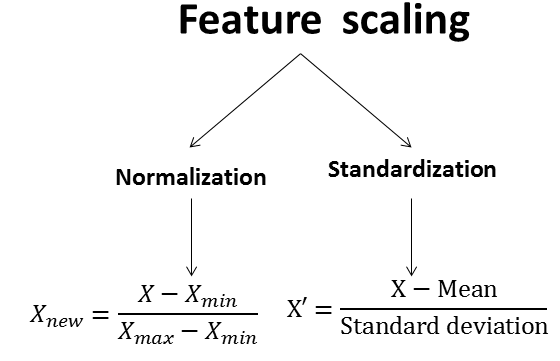

# #5.Handling Outliers Questions:

What are outliers, and why might they impact machine learning models?

**Outliers** are data points significantly different from the majority in a dataset.
They can impact machine learning models by skewing predictions, violating statistical assumptions, and affecting algorithms sensitive to distances or patterns. Handling outliers is essential for maintaining model robustness, accuracy, and generalizability. Strategies include removal, transformation, or using robust models designed to resist the influence of extreme values.

Describe different methods for detecting outliers in a dataset in Python.

Outliers can be identified using statistical methods such as the z-score and the interquartile range (IQR). The z-score measures how many standard deviations a data point is away from the mean, while the IQR measures the spread of the middle 50% of the data.

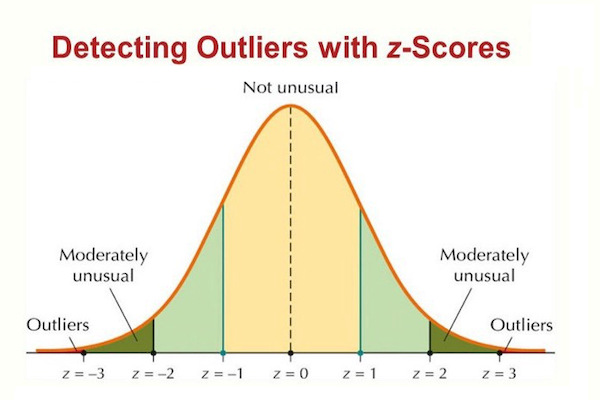 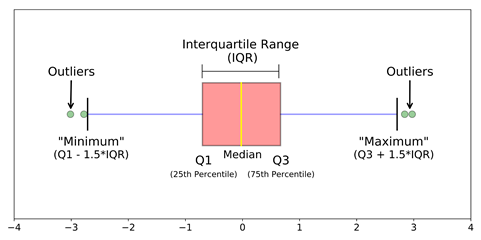


How can you handle outliers in a continuous numerical variable in Python?

Handling outliers in a continuous numerical variable involves various strategies to mitigate their impact on data analysis or machine learning models.
Use data visualization techniques to inspect the data's distribution and verify the presence of outliers.
Use a statistical method to calculate the outlier data points.
Apply a statistical method to drop or transform the outliers. 